In [1]:
import pandas as pd

# 파일 경로 설정
file_path = "machine_failure.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head())  # 처음 5개 행 출력

      id type  temp_air  temp_process  speed  torque  tool_wear  is_failure
0  14860    M     298.1         308.6   1551    42.8          0           0
1  47181    L     298.2         308.7   1408    46.3          3           0
2  47182    L     298.1         308.5   1498    49.4          5           0
3  47183    L     298.2         308.6   1433    39.5          7           0
4  47184    L     298.2         308.7   1408    40.0          9           0


In [2]:
# 데이터프레임의 정보 출력
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9982 non-null   int64  
 1   type          9982 non-null   object 
 2   temp_air      9982 non-null   float64
 3   temp_process  9982 non-null   float64
 4   speed         9982 non-null   int64  
 5   torque        9982 non-null   float64
 6   tool_wear     9982 non-null   int64  
 7   is_failure    9982 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 624.0+ KB
None


In [3]:
# 데이터프레임의 각 열에 대한 기술 통계량 요약
print(df.describe())

                 id     temp_air  temp_process        speed       torque  \
count   9982.000000  9982.000000   9982.000000  9982.000000  9982.000000   
mean   40704.791725   300.003556    310.004208  1538.865057    39.980535   
std    14873.559134     2.000506      1.483436   179.375123     9.966712   
min    14860.000000   295.300000    305.700000  1168.000000     3.800000   
25%    23209.250000   298.300000    308.800000  1423.000000    33.200000   
50%    48856.500000   300.100000    310.100000  1503.000000    40.100000   
75%    53002.500000   301.500000    311.100000  1612.000000    46.700000   
max    57174.000000   304.500000    313.800000  2886.000000    76.600000   

         tool_wear   is_failure  
count  9982.000000  9982.000000  
mean    107.929473     0.033060  
std      63.646655     0.178801  
min       0.000000     0.000000  
25%      53.000000     0.000000  
50%     108.000000     0.000000  
75%     162.000000     0.000000  
max     253.000000     1.000000  


In [4]:
# 연속형 변수의 유니크한 값 확인
print(df['temp_air'].unique())

[298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]


In [5]:
# 범주형 변수의 값의 빈도수 확인
print(df['type'].value_counts())

type
L    5988
M    2995
H     999
Name: count, dtype: int64


In [6]:
# "type" 변수별로 그룹화하고 수치형 변수의 통계량 계산
numeric_columns = ['temp_air', 'temp_process', 'speed', 'torque', 'tool_wear', 'is_failure']
grouped_stats = df.groupby('type')[numeric_columns].describe()

# 결과 출력
print(grouped_stats)

     temp_air                                                           \
        count        mean       std    min    25%    50%    75%    max   
type                                                                     
H       999.0  299.863163  2.022252  295.5  298.2  299.8  301.3  304.2   
L      5988.0  300.013627  1.987800  295.3  298.4  300.1  301.5  304.5   
M      2995.0  300.030250  2.017272  295.3  298.3  300.1  301.6  304.4   

     temp_process              ... tool_wear        is_failure            \
            count        mean  ...       75%    max      count      mean   
type                           ...                                         
H           999.0  309.922823  ...     160.0  246.0      999.0  0.020020   
L          5988.0  310.010070  ...     163.0  251.0     5988.0  0.038577   
M          2995.0  310.019633  ...     162.0  253.0     2995.0  0.026377   

                                         
           std  min  25%  50%  75%  max  
type          

In [7]:
# "type" 변수별로 그룹화하고 수치형 변수의 통계량 계산
grouped_stats = df.groupby('type')[numeric_columns].describe()

# 각 그룹별로 통계량 출력
for group_name, group_data in grouped_stats.groupby(level=0):
    print(f"\nType: {group_name}")
    print(group_data)


Type: H
     temp_air                                                           \
        count        mean       std    min    25%    50%    75%    max   
type                                                                     
H       999.0  299.863163  2.022252  295.5  298.2  299.8  301.3  304.2   

     temp_process              ... tool_wear        is_failure           \
            count        mean  ...       75%    max      count     mean   
type                           ...                                        
H           999.0  309.922823  ...     160.0  246.0      999.0  0.02002   

                                         
           std  min  25%  50%  75%  max  
type                                     
H     0.140139  0.0  0.0  0.0  0.0  1.0  

[1 rows x 48 columns]

Type: L
     temp_air                                                         \
        count        mean     std    min    25%    50%    75%    max   
type                                             

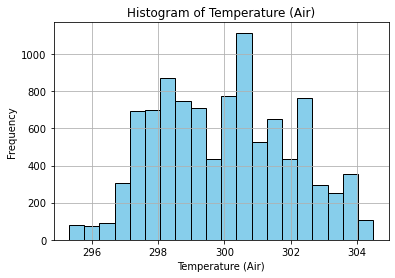

In [8]:
import matplotlib.pyplot as plt

# "temp_air" 변수에 대한 히스토그램 그리기
plt.hist(df['temp_air'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature (Air)')
plt.xlabel('Temperature (Air)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [9]:
# "is_failure" 열의 고유한 값 확인
unique_values = df['is_failure'].unique()
print(unique_values)

[0 1]


In [11]:
from scipy.stats import chi2_contingency

# contingency table 생성
contingency_table = pd.crosstab(df['is_failure'], df['type'])

# 카이제곱 검정 실행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 15.200002678363525
P-value: 0.0005004507632456266
Degrees of Freedom: 2
Expected Frequencies:
 [[ 965.97355239 5790.03967141 2895.9867762 ]
 [  33.02644761  197.96032859   99.0132238 ]]
